In [31]:
import time
start = time.time()

In [32]:
## Kütüphanelerin import edilmesi
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [33]:
## Sklearn kütüphanelerinin import edilmesi

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing

In [34]:
## Yapay Sinir Ağları için Keras kütüphanelerinin import edilmesi

from keras.models import Sequential
from keras.layers import merge
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import PReLU
from keras.layers import Convolution2D, Convolution1D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [6]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving submission.csv to submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [35]:
## Train Veri Seti
parent_data = pd.read_csv('train.csv')
data = parent_data.copy()   
data.pop('id')

0         1
1         2
2         3
3         5
4         6
       ... 
985    1575
986    1578
987    1581
988    1582
989    1584
Name: id, Length: 990, dtype: int64

In [36]:
## Test Veri Seti
test = pd.read_csv('test.csv')
testId = test.pop('id')

In [37]:
data.head()

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [38]:
## Sayısal hale dönüştürme işlemi yapıldı
species_label = data.pop('species')
species_label = LabelEncoder().fit(species_label).transform(species_label)
print(species_label.shape)

(990,)


In [39]:
one_hot = to_categorical(species_label)
print(one_hot.shape)

(990, 99)


In [40]:
preprocessed_train_data = preprocessing.MinMaxScaler().fit(data).transform(data)
preprocessed_train_data = StandardScaler().fit(data).transform(data)

print(preprocessed_train_data.shape)

(990, 192)


In [41]:
## Eğitim setinden Test setine aynı dönüşümler yapıldı
test = preprocessing.MinMaxScaler().fit(test).transform(test)
test = StandardScaler().fit(test).transform(test)

In [42]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3,random_state=12345)
train_index, val_index = next(iter(sss.split(preprocessed_train_data, one_hot)))

x_train, x_val = preprocessed_train_data[train_index], preprocessed_train_data[val_index]
y_train, y_val = one_hot[train_index], one_hot[val_index]

print("x_train dim: ",x_train.shape)
print("x_val dim:   ",x_val.shape)

x_train dim:  (693, 192)
x_val dim:    (297, 192)


In [43]:
model = Sequential()

model.add(Dense(768,input_dim=192,  kernel_initializer='glorot_normal', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(768, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(99, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 768)               148224    
                                                                 
 dropout_2 (Dropout)         (None, 768)               0         
                                                                 
 dense_4 (Dense)             (None, 768)               590592    
                                                                 
 dropout_3 (Dropout)         (None, 768)               0         
                                                                 
 dense_5 (Dense)             (None, 99)                76131     
                                                                 
Total params: 814,947
Trainable params: 814,947
Non-trainable params: 0
_________________________________________________________________


In [44]:
## Adagrad, rmsprop, SGD, Adadelta, Adam, Adamax, Nadam

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics = ["accuracy"])

In [45]:
%%time
early_stopping = EarlyStopping(monitor='val_loss', patience=300)

history = model.fit(x_train, y_train,batch_size=192,epochs=2500 ,verbose=1,
                    validation_data=(x_val, y_val),callbacks=[early_stopping])

Epoch 1/2500
4/4 [==============================] - 1s 96ms/step - loss: 4.5128 - accuracy: 0.0491 - val_loss: 3.5733 - val_accuracy: 0.3535
Epoch 2/2500
4/4 [==============================] - 0s 38ms/step - loss: 3.3927 - accuracy: 0.3175 - val_loss: 2.6512 - val_accuracy: 0.6734
Epoch 3/2500
4/4 [==============================] - 0s 54ms/step - loss: 2.4168 - accuracy: 0.6003 - val_loss: 1.7217 - val_accuracy: 0.8384
Epoch 4/2500
4/4 [==============================] - 0s 35ms/step - loss: 1.5672 - accuracy: 0.7605 - val_loss: 0.9806 - val_accuracy: 0.9327
Epoch 5/2500
4/4 [==============================] - 0s 33ms/step - loss: 0.9599 - accuracy: 0.8456 - val_loss: 0.5370 - val_accuracy: 0.9495
Epoch 6/2500
4/4 [==============================] - 0s 38ms/step - loss: 0.5649 - accuracy: 0.9105 - val_loss: 0.3429 - val_accuracy: 0.9731
Epoch 7/2500
4/4 [==============================] - 0s 39ms/step - loss: 0.4234 - accuracy: 0.9192 - val_loss: 0.2249 - val_accuracy: 0.9832
Epoch 8/2500


In [46]:
print('val_acc: ',max(history.history['val_accuracy']))
print('val_loss: ',min(history.history['val_loss']))
print('train_acc: ',max(history.history['accuracy']))
print('train_loss: ',min(history.history['loss']))

print()
print("train/val loss ratio: ", min(history.history['loss'])/min(history.history['val_loss']))

val_acc:  1.0
val_loss:  0.004055082332342863
train_acc:  1.0
train_loss:  1.8184629880124703e-05

train/val loss ratio:  0.004484404603843976


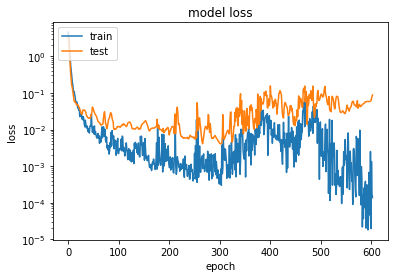

<Figure size 432x288 with 0 Axes>

In [47]:
## Kayıp için geçmişi özetle
## Kaybı yineleme sayısı ile çizme
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

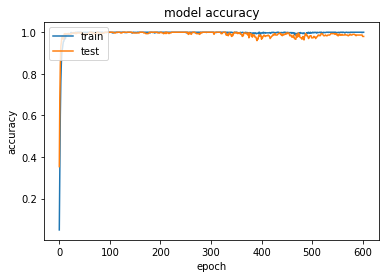

<Figure size 432x288 with 0 Axes>

In [48]:
## Hatayı yineleme sayısı ile çizme
## Her yinelemede hata sorunsuz şekilde çalışır
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

In [49]:
yPred = model.predict_on_batch(test)

In [50]:
## Converting the test predictions in a dataframe as depicted by sample submission
submission = pd.DataFrame(yPred,index=testId,columns=sort(parent_data.species.unique()))

In [51]:
submission.to_csv('leafClassificationSubmission.csv')

end = time.time()
print(round((end-start),2), "seconds")

181.61 seconds


In [52]:
submission.head()

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
id,,,,,,,,,,,,,,,,,,,,,
4,2.917364e-19,1.601428e-19,9.898620e-25,1.681752e-16,9.797785e-18,5.234284e-18,2.807636e-19,1.232271e-22,5.558559e-24,2.884295e-22,...,7.336963e-20,1.922539e-18,2.852463e-24,2.308004e-24,7.125684e-25,2.478850e-23,2.377948e-22,2.533677e-24,5.237684e-16,1.136788e-25
7,5.922716e-19,2.996160e-16,5.454980e-12,7.333194e-14,1.952818e-15,7.970609e-13,1.757541e-10,6.610248e-17,3.814030e-18,3.196192e-16,...,2.973455e-17,6.175424e-19,1.225312e-19,2.030325e-20,3.937733e-23,1.249676e-13,9.839365e-17,2.313780e-11,4.359894e-20,1.817777e-15
9,2.312113e-14,9.999999e-01,9.936026e-19,1.004096e-18,1.535450e-07,3.124955e-14,1.274681e-20,6.840905e-15,7.692347e-15,3.650696e-15,...,3.240483e-18,1.823617e-23,1.539725e-20,7.683660e-24,6.580053e-26,5.059081e-23,1.134738e-19,3.742711e-20,2.348274e-20,1.947404e-09
12,1.730318e-15,1.054542e-07,8.941590e-12,9.048728e-17,1.311519e-16,2.609470e-17,8.500660e-16,1.422018e-16,7.086167e-16,3.608291e-14,...,1.431750e-17,2.184886e-21,1.049988e-14,3.216959e-18,3.551410e-24,3.706192e-12,2.949346e-07,8.105726e-12,6.810432e-18,5.678588e-10
13,8.850307e-19,1.153815e-15,3.920244e-22,1.127199e-23,4.098076e-17,4.687162e-21,7.332263e-20,3.638508e-20,1.316987e-11,4.890106e-18,...,4.151936e-18,3.834314e-22,1.366071e-16,7.127660e-20,2.115034e-19,1.471872e-16,1.604714e-09,1.347876e-16,9.270423e-16,1.175521e-17
